In [1]:
import re
from pathlib import Path

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import numpy as np
import pandas as pd

DATA_PATH = Path.cwd().parents[0] / "data"
FIGURE_PATH = Path.cwd().parents[0] / "figures"

In [2]:
data = pd.read_csv(DATA_PATH / "data-extracted-20230818.csv")
animal_data = data[
    (data["Included/exclude"] == "included") & (data["Species"] != "human")
]
animal_data.head()

,Person in charge,Authors,Year,Title,DOI or PMID,Language,"Country (e.g., where RCT was performed)",Included/exclude,Reason for exclusion,Reason for exclusion.1,...,Timing of assessement.1,Was observer blinded?.1,Drug effect on neuroanatomical assessment,Drug effect on neuroanatomical assessment (details),Drugs given to treat infections/pain ect.,Conclusion of study,Limitations,Remarks/Comments,Combination of drugs tested,Contradictions present in the results
45,Lucie,Pinzon et al.,2008,A re-assessment of minocycline as a neuroprote...,10.1016/j.brainres.2008.09.047,English,NaN,included,NaN,NaN,...,6 weeks,not reported,no effect,spared tissue area or cavitation were not sign...,anesthesia: inhaled halothane was followed by ...,Administration of minocycline after SCI did no...,not reported,negative results reported (i.e. no effect),No,NaN
47,Lucie,Sharp et al,2013,A re-assessment of the effects of treatment wi...,10.1016/j.expneurol.2013.06.023,English,NaN,included,NaN,NaN,...,6 weeks,yes,no effect,There were no obvious qualitative differences ...,anesthesia: ketamine 75 mg/kg and xylazine 10 ...,"Taken together, our results only partially rep...",not reported,replication study where they are actually not ...,No,NaN
55,Lucie,Liu et al,2015,A single bolus of docosahexaenoic acid promote...,10.1523/JNEUROSCI.0605-15.2015,English,NaN,included,NaN,NaN,...,"1 day, 1 week, 3 weeks",yes,mixed effects (assessment),Serotonin fibers in the rostral part of the le...,"anesthesia: isoflurane; ""pain relief was provi...",We conclude that acute docosahexaenoic acid (D...,not reported,NaN,No,NaN
57,Catherine,Bimbova et al,2018,A Single Dose of Atorvastatin Applied Acutely ...,10.3390/ijms19041106,English,NaN,included,NaN,NaN,...,"immediatly after injury, 4 and 24hrs after injury",not reported,positive effect,Avorstatin significantly reduced the early inf...,Anesthesia: Isoflurane (2-4%)\nAntibiotic drug...,"Atorvastatin (5 mg/kg, i.p.) injected in a sin...",Not reported,NaN,No,NaN
58,Catherine,Liu et al,2017,A Single Dose of Docosahexaenoic Acid Increase...,10.1089/neu.2016.4556,English,NaN,included,NaN,NaN,...,"1 day, 1 week, 3 weeks",yes,no effect,DHA was only effective in combination with ext...,Subcutaneous injection of analgesic (buprenorp...,the effect of rehabilition can be enhanced adm...,Short term rehabilitation regime in the early ...,NaN,No,NaN


In [3]:
animal_data.shape

(464, 77)

In [4]:
animal_data["DOI or PMID"].unique().shape

(377,)

In [5]:
animal_data["Injury level"].unique()

array(['T9 - T10', 'T6 - T7', 'C4 - C5', 'T9', 'T11 - T12', 'T10',
       'C3 - C4', 'T12 - T13', 'T11', 'T8 - T10', 'T12', 'T8 - T9',
       'T5 - T8', 'C2 - C4', 'C7', 'lumbar - sacral', 'C5',
       'mid-thoracic', 'T4', 'T8', 'C2', 'T7', 'T7 - T9', 'Not reported',
       'T7 - T10', 'T3', 'C7 - T1', 'C4', 'T10 - T11', 'T9 - T11',
       'thoracic', 'T13', 'T12 - L1', 'T6 - T10', 'L2', 'T7 - T8', 'T1',
       'T9 + C5', 'T6', 'T6 - T9', 'T8 - T11',
       'level of 13 segments caudal to the anus (about 60% of the total body length)',
       'T3 - T4', 'L3 - L4', 'C7 - C8', 'T4 + T12', 'T8 - T12', 'C8 - T1',
       'T10 - T12', 'T6 - T8', 'C5 - C6',
       'group 1: T7 - T9 \ngroup 2: T12', 'L1', 'L1 - L2', 'T13 - L1',
       nan, 'C6', 'cervical', 'L4'], dtype=object)

In [6]:
animal_data["Injury level"] = animal_data["Injury level"].str.strip()
# filter injury patterns to only include single levels or valid ranges (lvl - lvl);
# combination of multiple levels (e.g. T9 + C5) not considered valid
injury_lvl_pattern = re.compile(
    "^([CTL][1-9]{1}[0-4]{0,1})(?!\+)( - )?([CTL][1-9]{1}[0-3]{0,4})?"
)
injury_lvls = []
for lvl in animal_data["Injury level"].unique():
    try:
        m = injury_lvl_pattern.fullmatch(lvl)
        if m:
            injury_lvls.append(lvl)
    except:
        pass

/var/folders/vk/14gd1sx100d0h0k10gy52xlw0000gq/T/ipykernel_7860/3742446650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animal_data["Injury level"] = animal_data["Injury level"].str.strip()


In [7]:
injury_lvls[:10]

['T9 - T10',
 'T6 - T7',
 'C4 - C5',
 'T9',
 'T11 - T12',
 'T10',
 'C3 - C4',
 'T12 - T13',
 'T11',
 'T8 - T10']

In [8]:
animal_data["Injury level"].value_counts()[injury_lvls].head()

Injury level
T9 - T10     50
T6 - T7      14
C4 - C5       3
T9           62
T11 - T12     2
Name: count, dtype: int64

In [9]:
# ranges only
animal_data["Injury level"].value_counts()[injury_lvls].filter(
    regex="[CTL][0-9]{1,2} -"
)

Injury level
T9 - T10     50
T6 - T7      14
C4 - C5       3
T11 - T12     2
C3 - C4       1
T12 - T13     5
T8 - T10      8
T8 - T9      16
T5 - T8       3
C2 - C4       2
T7 - T9      12
T7 - T10     16
C7 - T1       4
T10 - T11     3
T9 - T11      5
T12 - L1      3
T6 - T10      1
T7 - T8       8
T6 - T9       1
T8 - T11      1
T3 - T4       2
L3 - L4       2
C7 - C8       1
T8 - T12      2
C8 - T1       1
T10 - T12     2
T6 - T8       1
C5 - C6       1
L1 - L2       1
T13 - L1      1
Name: count, dtype: int64

In [10]:
# try sorting; not perfect
nlis_value_count = animal_data["Injury level"].value_counts()[injury_lvls].sort_index(
    key=lambda x: x.str.split("-")
)
nlis_value_count.head(5)

Injury level
C2         2
C2 - C4    2
C3 - C4    1
C4         3
C4 - C5    3
Name: count, dtype: int64

In [11]:
nlis_value_count[nlis_value_count.index.str.startswith("C")]

Injury level
C2         2
C2 - C4    2
C3 - C4    1
C4         3
C4 - C5    3
C5         6
C5 - C6    1
C6         1
C7         7
C7 - C8    1
C7 - T1    4
C8 - T1    1
Name: count, dtype: int64

In [12]:
nlis_value_count[nlis_value_count.index.str.startswith("T")]

Injury level
T1            7
T10          87
T10 - T11     3
T10 - T12     2
T11           9
T11 - T12     2
T12          23
T12 - L1      3
T12 - T13     5
T13           2
T13 - L1      1
T3            7
T3 - T4       2
T4            5
T5 - T8       3
T6            2
T6 - T10      1
T6 - T7      14
T6 - T8       1
T6 - T9       1
T7            6
T7 - T10     16
T7 - T8       8
T7 - T9      12
T8           28
T8 - T10      8
T8 - T11      1
T8 - T12      2
T8 - T9      16
T9           62
T9 - T10     50
T9 - T11      5
Name: count, dtype: int64

In [13]:
nlis_value_count[nlis_value_count.index.str.startswith("L")]

Injury level
L1         3
L1 - L2    1
L2         2
L3 - L4    2
L4         1
Name: count, dtype: int64

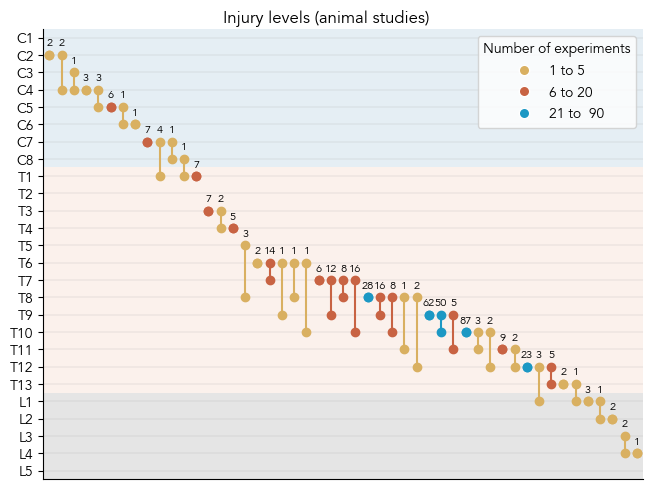

In [14]:
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = "Avenir"
plt.rcParams["figure.titlesize"] = 12
plt.rcParams["axes.titlesize"] = 12
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10
plt.rcParams["legend.title_fontsize"] = 10
plt.rcParams["font.size"] = 10


def plot_injury_lvls(
    injury_lvl_counts,
    highlight_regions=False,
    use_color=False,
    legend="cbar",
    color_spacing="proportional",
):
    """
    injury_lvl_counts[pd.Series]: Series with injury level (or range) as index and
        counts as values.
    highlight_regions[bool]: indicate whether different spinal regions should be
        highlighted using background colour
    use_color[bool]: indicate whether NLI (range) count should be hihglighted using
        colours
    legend["cbar", "cat"]: style of legend (cbar ~ colourbar, cat ~ categories)
    color_spacing["proportional", "uniform"]: spacing in colourbar
    """
    y_tick_labels = (
        [f"C{i}" for i in range(1, 9)]
        + [f"T{i}" for i in range(1, 14)]
        + [f"L{i}" for i in range(1, 6)]
    )
    y_tick_mapping = {
        lbl: coord for lbl, coord in zip(y_tick_labels, np.arange(len(y_tick_labels), 0, -1))
    }
    injury_lvls_sorted = sorted(
        injury_lvl_counts.index.to_list(),
        key=lambda x: (y_tick_mapping[x.split("-")[0].strip()], -len(x)),
        reverse=True,
    )

    fig, ax = plt.subplots(1, 1)
    ax.set_ylim(0.5, len(y_tick_labels) + 0.5)
    ax.set_yticks(np.arange(1, len(y_tick_labels) + 1, 1))
    ax.set_yticklabels(y_tick_labels[::-1], size=8)
    ax.set_xlim(0.5, injury_lvl_counts.shape[0] + 0.5)
    ax.tick_params(axis="x", bottom=False, labelbottom=False)

    if use_color:
        cmap = matplotlib.colors.LinearSegmentedColormap.from_list(
            "custom cmap", ["#D9B061", "#C86343", "#1C98C4"]
        )
        bounds = [1, 5, 20, ((injury_lvl_counts.max() // 5 + 1) * 5)]
        norm = matplotlib.colors.BoundaryNorm(bounds, cmap.N)
        sm = matplotlib.cm.ScalarMappable(cmap=cmap, norm=norm)
        if legend == "cbar":
            ax_inset = inset_axes(
                ax,
                width="25%",
                height="5%",
                loc="upper right",
                borderpad=0.75,
            )
            cbar = fig.colorbar(
                sm,
                cax=ax_inset,
                orientation="horizontal",
                spacing=color_spacing,
            )
            cbar.set_ticks([1, 5, 20, 87])
            cbar.ax.tick_params(labelsize=8)
        if legend == "cat":
            legend_circles = [
                matplotlib.lines.Line2D(
                    [],
                    [],
                    linewidth=0,
                    marker="o",
                    markersize=7.5,
                    markerfacecolor=sm.to_rgba(c),
                    markeredgecolor="white",
                )
                for c in [1, 6, 21]
            ]
            ax.legend(
                legend_circles,
                [
                    "1 to 5",
                    "6 to 20",
                    f"21 to {np.round(injury_lvl_counts.max() / 10, decimals=0) * 10: .0f}"
                ],
                title="Number of experiments",
                fontsize=10,
                title_fontsize=10,
            )
    for i, injury_lvl in enumerate(injury_lvls_sorted):
        try:
            start, end = injury_lvl.split("-")
            start, end = start.strip(), end.strip()
        except ValueError:
            start, end = injury_lvl, injury_lvl

        ax.plot(
            [i + 1, i + 1],
            [y_tick_mapping[start], y_tick_mapping[end]],
            marker="o",
            color=sm.to_rgba(injury_lvl_counts[injury_lvl]) if use_color else "k",
        )
        ax.text(
            i + 1,
            y_tick_mapping[start] + 0.5,
            injury_lvl_counts[injury_lvl],
            ha="center",
            size=8,
        )
    if highlight_regions:
        # use different background colours to highlight spinal regions
        ax.axhspan(
            y_tick_mapping["C8"] - 0.5, ax.get_ylim()[1], facecolor="#00629A", alpha=0.1
        )
        ax.axhspan(
            y_tick_mapping["T13"] - 0.5,
            y_tick_mapping["C8"] - 0.5,
            facecolor="#D97847",
            alpha=0.1,
        )
        ax.axhspan(
            ax.get_ylim()[0], y_tick_mapping["T13"] - 0.5, facecolor="k", alpha=0.1
        )
    # options for frame
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.yaxis.set_ticks_position("left")
    ax.tick_params(axis="y", which="major", labelsize=10)
    # ...and grid lines
    ax.grid(True, axis="y", linewidth=0.2)

    fig.suptitle("Injury levels (animal studies)", y=0.99)
    fig.tight_layout(pad=0.25)
    return fig


fig = plot_injury_lvls(
    animal_data["Injury level"].value_counts()[injury_lvls],
    highlight_regions=True,
    use_color=True,
    legend="cat",
    color_spacing="proportional",
)
# fig.savefig(FIGURE_PATH / "Figure2X-NLI-levels-and-ranges.eps", dpi=300)